# Task 5: Regularized Regression

### Listing A.4: Task-5: Model Construction and Design Matrix Formulation

In [9]:
import numpy as np
import pandas as pd

# Define the dataset ξ16 with one data pair per row
data_xi16 = [
    (1, -10.24),
    (19, -15295511548733.77),
    (-7, -340514054.7),
    (13, -354986140067.66),
    (15, -1450376378404.87),
    (-14, -434256783711.35),
    (-3, -34043.85),
    (-8, -1385074595.29),
    (20, -25031955628533.28),
    (-15, -907249788111.6),
    (8, -3107030122.71),
    (-9, -4694715948.53),
    (-11, -35389191960.77),
    (-13, -210969674396.46),
    (3, -285107.31),
    (12, -156106313345.93),
    (-18, -5663535268781.21),
    (-1, -8.15),
    (-16, -1743997562490.91),
    (18, -8319064234624.53),
    (7, -883391785.56),
    (-10, -14199179779.16)
]

# Convert the data into numpy arrays for computation
x_values = np.array([point[0] for point in data_xi16])
y_values = np.array([point[1] for point in data_xi16])

# Define the degree of the polynomial model (degree 10)
degree = 10

# Construct the design matrix X
# Each column j represents x raised to the power of j (from 0 to degree)
X = np.vander(x_values, N=degree + 1, increasing=True)

# Display the design matrix as a DataFrame for readability
X_df = pd.DataFrame(X, columns=[f"x^{i}" for i in range(degree + 1)])
print("Design Matrix (X):")
print(X_df)

# Display the target vector y
y_df = pd.DataFrame(y_values, columns=["y"])
print("\nTarget Vector (y):")
print(y_df)


Design Matrix (X):
    x^0  x^1  x^2   x^3     x^4      x^5       x^6         x^7          x^8  \
0     1    1    1     1       1        1         1           1            1   
1     1   19  361  6859  130321  2476099  47045881   893871739  16983563041   
2     1   -7   49  -343    2401   -16807    117649     -823543      5764801   
3     1   13  169  2197   28561   371293   4826809    62748517    815730721   
4     1   15  225  3375   50625   759375  11390625   170859375   2562890625   
5     1  -14  196 -2744   38416  -537824   7529536  -105413504   1475789056   
6     1   -3    9   -27      81     -243       729       -2187         6561   
7     1   -8   64  -512    4096   -32768    262144    -2097152     16777216   
8     1   20  400  8000  160000  3200000  64000000  1280000000  25600000000   
9     1  -15  225 -3375   50625  -759375  11390625  -170859375   2562890625   
10    1    8   64   512    4096    32768    262144     2097152     16777216   
11    1   -9   81  -729    6561  

### Listing A.5: Task-5: Ordinary Least Squares (OLS) Estimation

In [10]:
import numpy as np

# Assuming the design matrix X and target vector y are already defined from the previous step

# OLS Estimation: Compute the coefficients using the normal equation
# alpha_hat = (X^T * X)^(-1) * X^T * y

# Compute X transpose
X_transpose = X.T

# Compute (X^T * X)
XtX = np.dot(X_transpose, X)

# Compute (X^T * y)
Xty = np.dot(X_transpose, y_values)

# Compute the inverse of (X^T * X)
XtX_inv = np.linalg.inv(XtX)

# Compute the OLS estimate of the coefficients
alpha_hat = np.dot(XtX_inv, Xty)

# Display the OLS coefficients
for i, coef in enumerate(alpha_hat):
    print(f"alpha_{i} = {coef}")


alpha_0 = -1037076988555.2158
alpha_1 = 158119442697.30457
alpha_2 = 43084410334.06149
alpha_3 = -946892884.8239942
alpha_4 = -213237572.35517684
alpha_5 = -96799.40011612792
alpha_6 = 8292.466689959547
alpha_7 = -150.1753281094616
alpha_8 = 17.754917888865066
alpha_9 = -0.16914492446416318
alpha_10 = 0.0332974468497137


### Listing A.6: Task-5: Ridge Regularization Implementation

In [4]:
import numpy as np

# Assuming the design matrix X and target vector y_values are already defined

# Define the regularization parameter lambda (commonly denoted as alpha in Python libraries)
lambda_reg = 1.0  # This value can be adjusted for experimentation

# Identity matrix of the same size as (X^T * X)
identity_matrix = np.identity(X.shape[1])

# Compute (X^T * X)
XtX = np.dot(X.T, X)

# Compute (X^T * y)
Xty = np.dot(X.T, y_values)

# Apply Ridge Regularization: (X^T * X + λ * I)^(-1) * (X^T * y)
XtX_ridge = XtX + lambda_reg * identity_matrix

# Compute the inverse of (X^T * X + λ * I)
XtX_ridge_inv = np.linalg.inv(XtX_ridge)

# Compute the ridge regression estimate of the coefficients
alpha_ridge = np.dot(XtX_ridge_inv, Xty)

# Display the ridge regression coefficients
for i, coef in enumerate(alpha_ridge):
    print(f"alpha_ridge_{i} = {coef}")


alpha_ridge_0 = -860043942704.6277
alpha_ridge_1 = 160597963376.92352
alpha_ridge_2 = 41090343815.37234
alpha_ridge_3 = -963394808.6466246
alpha_ridge_4 = -208718857.26237762
alpha_ridge_5 = -92027.91754480917
alpha_ridge_6 = 8164.707189220004
alpha_ridge_7 = -141.8559379633116
alpha_ridge_8 = 17.690786061030963
alpha_ridge_9 = -0.1575338030143172
alpha_ridge_10 = 0.03379818076808683


### Listing A.7: Task-5: Penalty Term Analysis

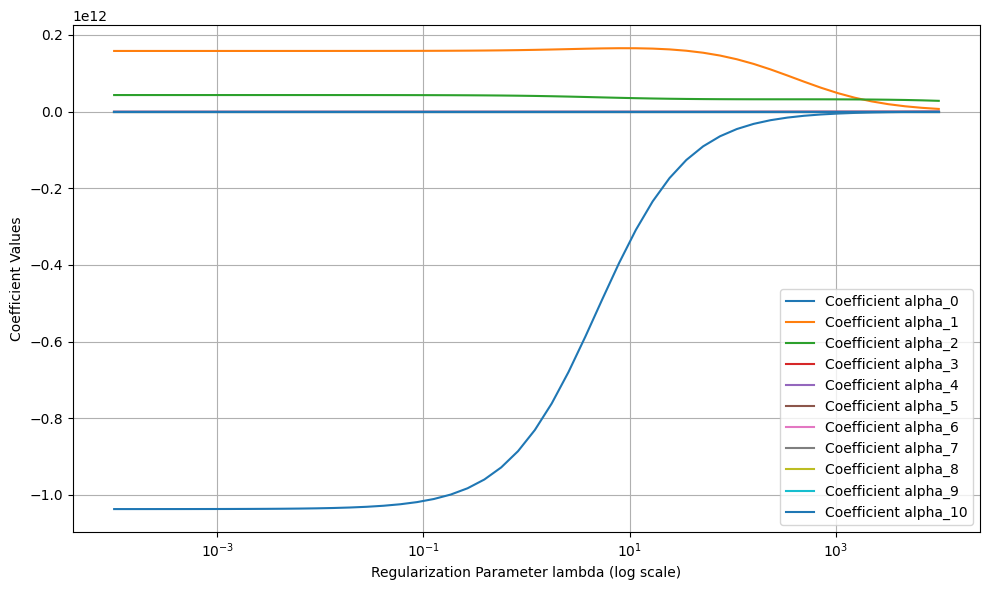

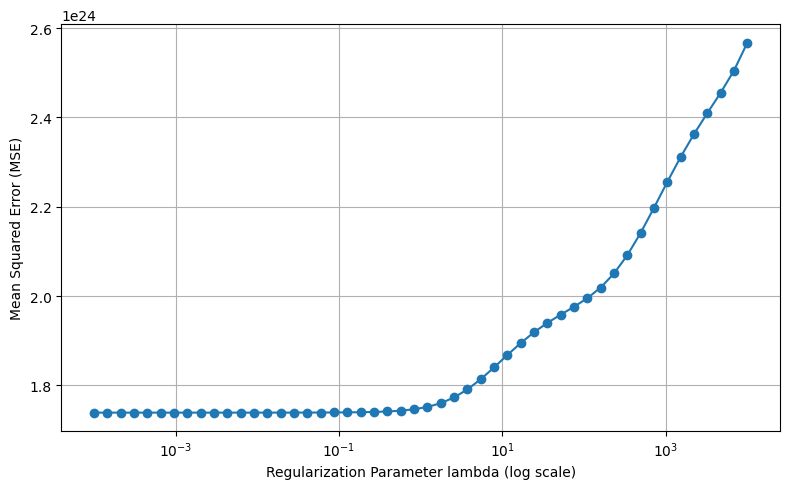

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assuming X (design matrix) and y_values (target vector) are already defined

# Define a range of lambda values to evaluate
lambda_values = np.logspace(-4, 4, 50)  # 50 values from 10^-4 to 10^4

# Initialize lists to store results
coefficients = []
mse_values = []

# Loop over different lambda values
for lambda_reg in lambda_values:
    # Identity matrix for regularization
    identity_matrix = np.identity(X.shape[1])
    
    # Ridge regression calculation: (X^T X + lambda * I)^(-1) * X^T * y
    XtX_ridge = np.dot(X.T, X) + lambda_reg * identity_matrix
    XtX_ridge_inv = np.linalg.inv(XtX_ridge)
    alpha_ridge = np.dot(XtX_ridge_inv, np.dot(X.T, y_values))
    
    # Store coefficients
    coefficients.append(alpha_ridge)
    
    # Predict values using the current model
    y_pred = np.dot(X, alpha_ridge)
    
    # Compute Mean Squared Error (MSE) for model evaluation
    mse = mean_squared_error(y_values, y_pred)
    mse_values.append(mse)

# Convert coefficients to a NumPy array for easier plotting
coefficients = np.array(coefficients, dtype=np.float64)  # Ensure numerical stability

# Plotting the effect of lambda on model coefficients
plt.figure(figsize=(10, 6))
for i in range(coefficients.shape[1]):
    plt.plot(lambda_values, coefficients[:, i], label=f'Coefficient alpha_{i}')
plt.xscale('log')
plt.xlabel('Regularization Parameter lambda (log scale)')
plt.ylabel('Coefficient Values')
# plt.title('Effect of lambda on Ridge Regression Coefficients')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the effect of lambda on Mean Squared Error
plt.figure(figsize=(8, 5))
plt.plot(lambda_values, mse_values, marker='o')
plt.xscale('log')
plt.xlabel('Regularization Parameter lambda (log scale)')
plt.ylabel('Mean Squared Error (MSE)')
# plt.title('Effect of lambda on Model Performance')
plt.grid(True)
plt.tight_layout()
plt.show()
